### Simple returns and log returns

In [3]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

%matplotlib inline

In [4]:
df = pd.DataFrame(index=[2016, 2017, 2018], data=[100,50,95], columns=["Price"])
df

,Price
2016,100
2017,50
2018,95


In [5]:
simple_returns = df.pct_change().dropna()
simple_returns

,Price
2017,-0.5
2018,0.9


In [6]:
# Simple returns doesnt give you the return from the start
simple_returns.mean()

Price    0.2
dtype: float64

In [7]:
# 20% mean return from 2016 will give you
100*1.2*1.2

144.0

In [8]:
# Log Returns
log_returns = np.log(df/df.shift(1)).dropna()
log_returns

,Price
2017,-0.693147
2018,0.641854


In [9]:
log_returns.mean()

Price   -0.025647
dtype: float64

What was the actual return from the start?

In [10]:
# Starting price was 100
# For 2 year period
100*np.exp(log_returns.mean()*2)

Price    95.0
dtype: float64

95 is the price at the end of two years!!!

### Simple Moving Average

In [11]:
SPY = yf.download("SPY")

[*********************100%***********************]  1 of 1 completed


In [25]:
spy = SPY.Close.to_frame()
spy

,Close
Date,
1993-01-29,43.937500
1993-02-01,44.250000
1993-02-02,44.343750
1993-02-03,44.812500
1993-02-04,45.000000
...,...
2022-04-22,426.040009
2022-04-25,428.510010
2022-04-26,416.100006


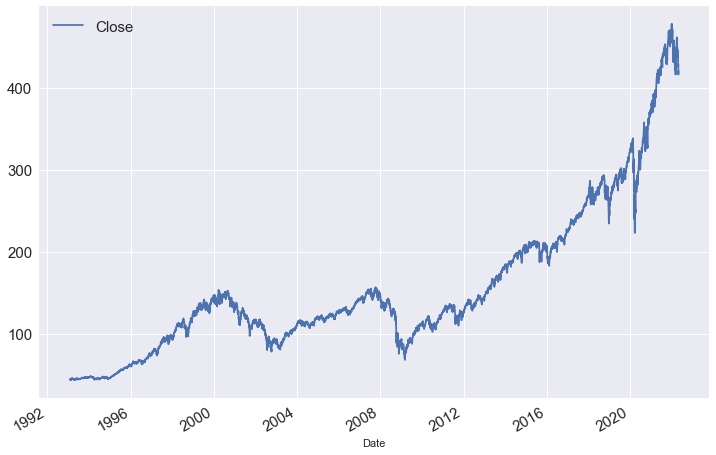

In [13]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [18]:
spy_roll = spy.rolling(window=10)
spy_roll = spy_roll.mean()
# First ten days will be NA as it takes 10 days of data
spy_roll.head(20)

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
1993-02-05,NaN
1993-02-08,NaN
1993-02-09,NaN
1993-02-10,NaN


In [19]:
# Calculate the median instead of means
spy.rolling(window=10).median().head(20)

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
1993-02-05,NaN
1993-02-08,NaN
1993-02-09,NaN
1993-02-10,NaN


In [20]:
spy.rolling(window=10).median().tail(10)

,Close
Date,
2022-04-14,447.044998
2022-04-18,444.914993
2022-04-19,444.175003
2022-04-20,444.009995
2022-04-21,441.615005
2022-04-22,439.105011
2022-04-25,438.175003
2022-04-26,438.014999
2022-04-27,437.880005


In [21]:
# Calculate max of the last 10 days
spy.rolling(window=10).max()

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
...,...
2022-04-22,447.570007
2022-04-25,445.040009
2022-04-26,445.040009


In [22]:
# Calculate max of the last 10 days
spy.rolling(window=10, min_periods=5).max().head(15)

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,45.00000
1993-02-05,45.00000
1993-02-08,45.00000
1993-02-09,45.00000
1993-02-10,45.00000


In [28]:
# Calcualte 50 day SMA of SPY
spy = SPY.Close.to_frame()
spy["SMA50"] = spy["Close"].rolling(window=50, min_periods=50).mean()
spy.head(52)

,Close,SMA50
Date,,
1993-01-29,43.93750,NaN
1993-02-01,44.25000,NaN
1993-02-02,44.34375,NaN
1993-02-03,44.81250,NaN
1993-02-04,45.00000,NaN
1993-02-05,44.96875,NaN
1993-02-08,44.96875,NaN
1993-02-09,44.65625,NaN
1993-02-10,44.71875,NaN


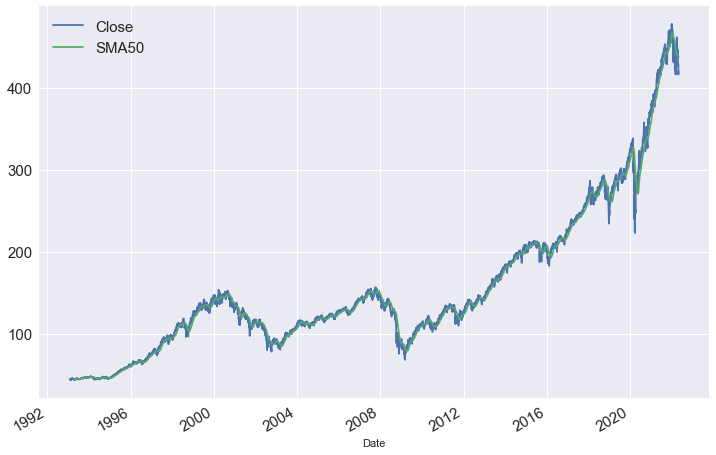

In [29]:
# Plot the SMA and Close Price
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [30]:
# 200 day mean
spy["SMA200"] = spy["Close"].rolling(window=50, min_periods=50).mean()
spy.tail()

,Close,SMA50,SMA200
Date,,,
2022-04-22,426.040009,439.585202,439.585202
2022-04-25,428.510010,439.169002,439.169002
2022-04-26,416.100006,438.681802,438.681802
2022-04-27,417.269989,438.246802,438.246802
2022-04-28,420.561401,437.736030,437.736030


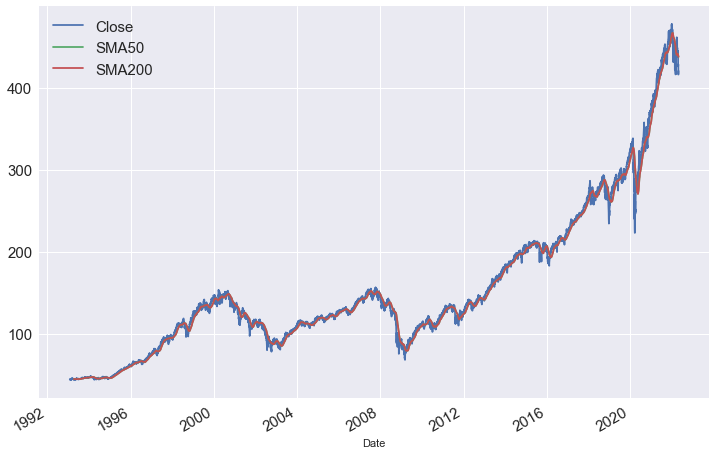

In [31]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [32]:
# 100 day Exponential Moving Average
spy["EMA100"] = spy.Close.ewm(span=100,min_periods=100).mean()
spy


,Close,SMA50,SMA200,EMA100
Date,,,,
1993-01-29,43.937500,NaN,NaN,NaN
1993-02-01,44.250000,NaN,NaN,NaN
1993-02-02,44.343750,NaN,NaN,NaN
1993-02-03,44.812500,NaN,NaN,NaN
1993-02-04,45.000000,NaN,NaN,NaN
...,...,...,...,...
2022-04-22,426.040009,439.585202,439.585202,445.468053
2022-04-25,428.510010,439.169002,439.169002,445.132250
2022-04-26,416.100006,438.681802,438.681802,444.557354


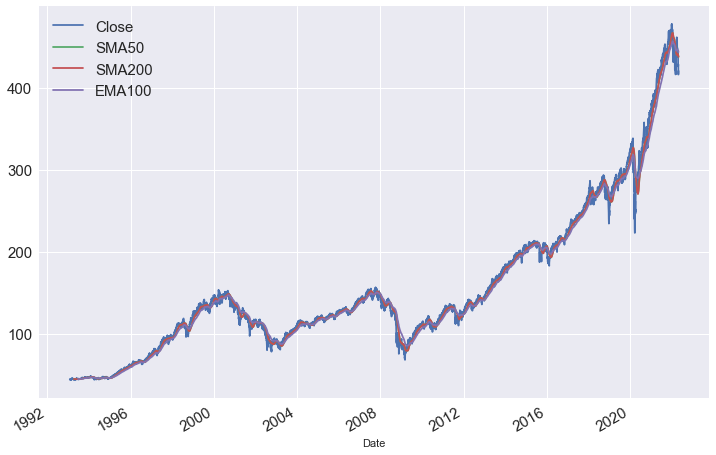

In [33]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()